100.0%┣██████████████████████████████████████████┫ 1/1 [00:00<Inf:Inf, 0.0 it/s]


┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.HiddenMarkovModel{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals},Main.Ntl.Models.MultinomialParameters}) at synthetic.jl:185
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:185
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.HiddenMarkovModel{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals},Main.Ntl.Models.MultinomialParameters}) at synthetic.jl:187
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:187


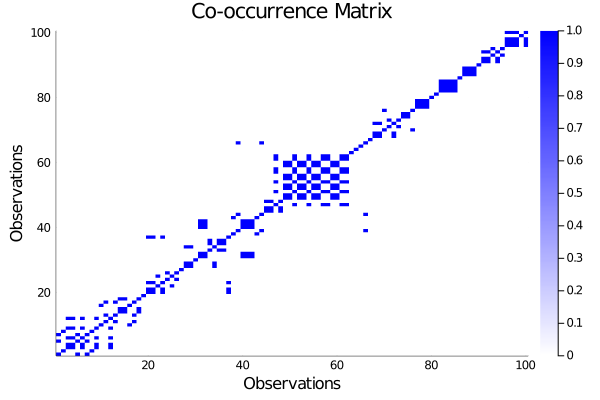

In [29]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(1)
dirichlet_scale = ones(Float64, 10)
data_parameters = Ntl.Models.MultinomialParameters(25, dirichlet_scale)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(phi_prior)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

model = Ntl.Models.HiddenMarkovModel(ntl_cluster_parameters, data_parameters)
hmm_data = Ntl.Generate.generate(model, n=100)
data = Matrix(transpose(hmm_data[:, 2:end]))
true_clustering = hmm_data[:, 1]
Ntl.Plot.plot_assignments(true_clustering)
Ntl.Plot.plot_co_occurrence_matrix(true_clustering)

100.0%┣███████████████████████████████████████┫ 999/999 [00:14<00:00, 73.0 it/s]
100.0%┣███████████████████████████████████┫ 1000/1000 [00:01<00:00, 1638.4 it/s]


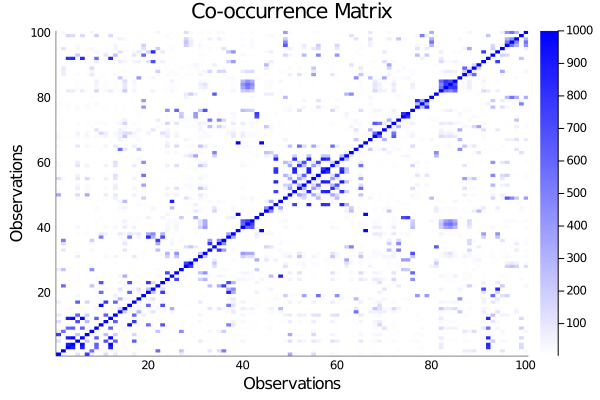

In [30]:
dp_arrivals = Ntl.Models.PitmanYorArrivals()
dp_parameters = Ntl.Models.BetaNtlParameters(0., dp_arrivals)
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=1000)
hmm_model = Ntl.Models.HiddenMarkovModel(dp_parameters, data_parameters)
markov_chain = Ntl.Fitter.fit(data, hmm_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(markov_chain)

100.0%┣██████████████████████████████████████████┫ 99/99 [00:32<00:00, 3.0 it/s]
100.0%┣███████████████████████████████████┫ 1000/1000 [00:01<00:00, 1771.2 it/s]


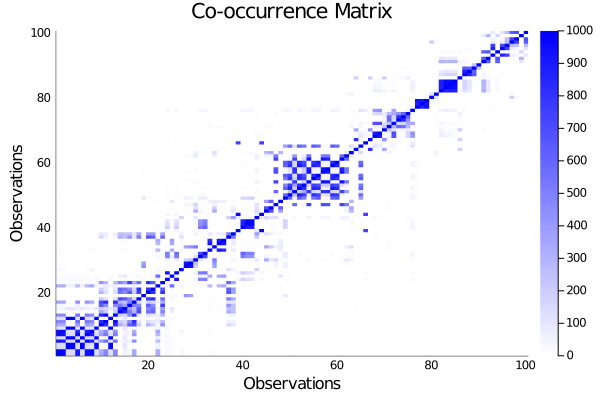

In [41]:
smc = Ntl.Samplers.SequentialMonteCarlo(num_particles=1000, ess_threshold=0.)
particles, weights = Ntl.Fitter.fit(data, model, smc)
Ntl.Plot.plot_co_occurrence_matrix(particles)

100.0%┣███████████████████████████████████┫ 1000/1000 [00:01<00:00, 1522.5 it/s]


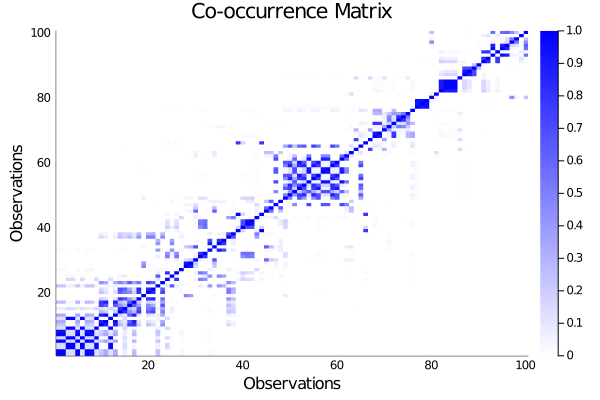

In [46]:
Ntl.Plot.plot_co_occurrence_matrix(particles, weights)

100.0%┣██████████████████████████████████████████┫ 99/99 [06:19<00:00, 0.3 it/s]
100.0%┣█████████████████████████████████┫ 10000/10000 [00:05<00:00, 1868.8 it/s]


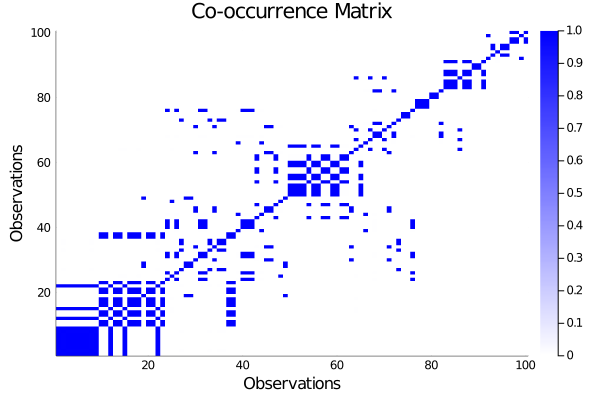

In [50]:
sis = Ntl.Samplers.SequentialImportanceSampler(num_particles=10000)
particles, weights = Ntl.Fitter.fit(data, model, sis)
Ntl.Plot.plot_co_occurrence_matrix(particles, weights)

100.0%┣███████████████████████████████████┫ 1000/1000 [00:01<00:00, 1844.4 it/s]


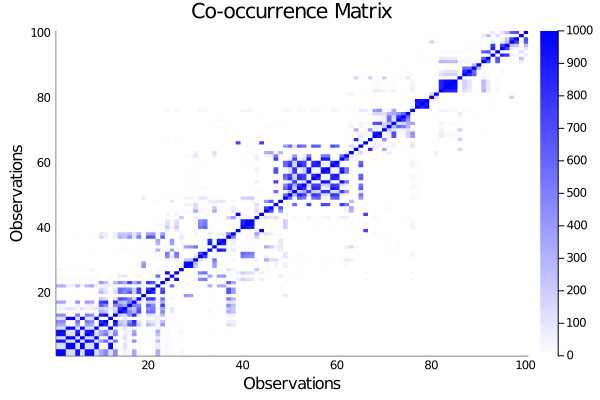

In [33]:
Ntl.Plot.plot_co_occurrence_matrix(particles)

In [49]:
weights

1000-element Array{Float64,1}:
 1.7404485909857164e-101
 5.090220105605793e-68  
 4.567474173225404e-97  
 2.5044388747468605e-106
 1.2238619145180517e-47 
 7.025462206952648e-88  
 1.7998384011114634e-45 
 1.705813856922611e-168 
 2.0658161732853057e-104
 2.2065515604298284e-109
 1.7720021042824159e-62 
 2.0541715689071722e-110
 4.862245249884861e-45  
 ⋮                      
 1.3765069611635547e-120
 8.549172533797678e-128 
 1.8146187662669356e-107
 1.2423938644170557e-91 
 4.577913388979651e-133 
 1.8549418388586112e-98 
 1.3570198596638523e-117
 5.468796308867154e-121 
 2.0404994105386722e-144
 6.993312576961092e-119 
 1.4001008538671113e-84 
 3.06617025876632e-104  